## Några hjälprutiner för html 

In [64]:
#require "jupyter.notebook"
#require "tyxml"

module Jup = struct 
include Jupyter_notebook
let showhtml = display "text/html"
let showsvg = display "image/svg+xml"
end 

module Htm = struct
let id = fun x -> x
let mapconcat ?(f=id) list = List.fold_left (fun s d -> s ^ (f d)) "" list

let td text = "<td>" ^ text ^ "</td>"
let th text = "<th>" ^ text ^ "</th>"
let tr text = "<tr>" ^ text ^ "</tr>\n"
let table text = "<table>\n" ^ text ^ "\n</table>\n"
(** [td text], [tr text], [th text] och [table text] kapsalr in [text] i motsvarande htmlelement *)

let ltable ?(hlist=[]) ll = 
    let header = hlist |> mapconcat ~f:th in
    let body = ll |> List.map (mapconcat ~f:td) |> mapconcat ~f:tr
    in 
      (if header <> "" then (tr header) ^ "\n" else "") ^ body |> table
end


let show = Jup.showhtml
(** [show str] tolkar [str] som html och ger formatterad utdata *)


/home/ajj/.opam/4.07.1/lib/seq: added to search path
/home/ajj/.opam/4.07.1/lib/re: added to search path
/home/ajj/.opam/4.07.1/lib/re/re.cma: loaded
/home/ajj/.opam/4.07.1/lib/uchar: added to search path
/home/ajj/.opam/4.07.1/lib/uutf: added to search path
/home/ajj/.opam/4.07.1/lib/uutf/uutf.cma: loaded
/home/ajj/.opam/4.07.1/lib/tyxml/functor: added to search path
/home/ajj/.opam/4.07.1/lib/tyxml/functor/tyxml_f.cma: loaded
/home/ajj/.opam/4.07.1/lib/ocaml/compiler-libs/ocamlbytecomp.cma: loaded
/home/ajj/.opam/4.07.1/lib/ocaml/compiler-libs/ocamltoplevel.cma: loaded
/home/ajj/.opam/4.07.1/lib/tyxml/top: added to search path
/home/ajj/.opam/4.07.1/lib/tyxml/top/tyxml_top.cma: loaded


Exception: Typetexp.Error (_, _, _).


/home/ajj/.opam/4.07.1/lib/tyxml: added to search path
/home/ajj/.opam/4.07.1/lib/tyxml/tyxml.cma: loaded


module Jup :
  sig
    type ctx = Jupyter_notebook.ctx
    type display_id = Jupyter_notebook.display_id
    val cell_context : unit -> ctx
    val display :
      ?ctx:ctx ->
      ?display_id:display_id ->
      ?metadata:Yojson.Safe.json ->
      ?base64:bool -> string -> string -> display_id
    val display_file :
      ?ctx:ctx ->
      ?display_id:display_id ->
      ?metadata:Yojson.Safe.json ->
      ?base64:bool -> string -> string -> display_id
    val clear_output : ?ctx:ctx -> ?wait:bool -> unit -> unit
    val formatter : Format.formatter
    val printf : ('a, Format.formatter, unit) format -> 'a
    val display_formatter :
      ?ctx:ctx ->
      ?display_id:display_id ->
      ?metadata:Yojson.Safe.json -> ?base64:bool -> string -> display_id
    val showhtml : string -> display_id
    val showsvg : string -> display_id
  end


module Htm :
  sig
    val id : 'a -> 'a
    val mapconcat : ?f:(string -> string) -> string list -> string
    val td : string -> string
    val th : string -> string
    val tr : string -> string
    val table : string -> string
    val ltable : ?hlist:string list -> string list list -> string
  end


val show : string -> Jup.display_id = <fun>


In [ ]:
let rec gen n = 
    if n <= 1 then 
        [ [true]; [false] ] 
    else let lll = gen (n-1) in 
          List.map (fun t -> List.map (fun lst -> (t :: lst)) lll) [true; false] |> List.concat
          
let make1arg f = function [p] -> f p           | _ -> failwith "Bad input!"
let make2arg f = function [p; q] -> f p q      | _ -> failwith "Bad input!"
let make3arg f = function [p; q; r] -> f p q r | _ -> failwith "Bad input!"
let make4arg f = function [p; q; r; s] -> f p q r s | _ -> failwith "Bad input!"
(** [makeXarg f] ger en funktion som tar en lista med [X] element *)

In [121]:
open Tyxml
open Html
let row1 = tr [td [txt "A"]; td [txt "B"]]
let div1 = div [table [row1; row1]]
let tit1 = title (txt "AAAA")
let hdr1 = h3 [txt "Anders"]
let doc1 = html (head tit1 []) (body [hdr1; div1])

val row1 : [> Html_types.tr ] Tyxml.Html.elt = <abstr>


val div1 : [> Html_types.div ] Tyxml.Html.elt = <abstr>


val tit1 : [> Html_types.title ] Tyxml.Html.elt = <abstr>


val hdr1 : [> Html_types.h3 ] Tyxml.Html.elt = <abstr>


val doc1 : [> Html_types.html ] Tyxml.Html.elt = <abstr>


In [120]:
let _ = Format.asprintf "%a" (Tyxml.Html.pp_elt ()) div1 |> show
let _ = Format.asprintf "%a" (Tyxml.Html.pp ()) doc1 |> show

A,B
A,B


- : Jup.display_id = <abstr>


A,B
A,B


- : Jup.display_id = <abstr>


In [4]:
type icname = 
    | Process of string
    | File of string
let openic = function 
    | Process cmd -> Unix.open_process_in cmd
    | File filename -> open_in filename
let readallic ic = 
  let buf = ref "" in 
  (try
    while true do
      let line = input_line ic in
      buf := !buf ^ line ^ "\n"
    done
  with End_of_file ->
    close_in ic); !buf

type icname = Process of string | File of string


val openic : icname -> in_channel = <fun>


val readic : in_channel -> string = <fun>


In [71]:
let svg = File "bBid.svg" |> openic |> readic 

val svg : string =
  "<svg xmlns=\"http://www.w3.org/2000/svg\" id=\"bB\" viewBox=\"0 0 45 45\"><g fill=\"none\" fill-rule=\"evenodd\" stroke=\"#000\" stroke-linejoin=\"round\" stroke-linecap=\"round\" stroke-width=\"1.5\"><g fill=\"#000\" stroke=\"#000\" stroke-linecap=\"butt\"><path d=\"m9 36c3.39-.97 10.11.43 13.5-2 3.39 2.43 10.11 1.03 13.5"... (* string length 750; truncated *)


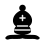

- : Jup.display_id = <abstr>


In [72]:
svg |> Jup.showsvg

In [63]:
svg|> show

- : Jup.display_id = <abstr>


In [66]:
{|
<svg width="100" height="100" viewBox="0 0 45 45" version="1.1"
     xmlns="http://www.w3.org/2000/svg">|}
^ svg ^
{|
</svg>
|} |> show

- : Jup.display_id = <abstr>


In [87]:
{|<svg width="50%" viewBox="0 0 30 10">
  <circle id="myCircle" cx="5" cy="5" r="4"/>
  <use href="#myCircle" x="10" fill="blue"/>
  <use href="#myCircle" x="20" fill="white" stroke="blue"/>
  <use href="#bB" x=50>
</svg>|} |> show

- : Jup.display_id = <abstr>


In [97]:
{|
<svg viewBox="0 0 40 40">
<use href="pieces/bB.svg"/>
</svg>
|} |> show

- : Jup.display_id = <abstr>


In [96]:
{|
<div style="background:#ffe7e8;  width:40%;  border: 2px solid #e66465;">
    <p style="margin: 15px; line-height: 1.5; text-align: center; color:black;">
        Well, I am the slime from your video<br>
        Oozin' along on your livin' room floor.</p>
</div>
|} |> show

Well, I am the slime from your video 
 Oozin' along on your livin' room floor.

- : Jup.display_id = <abstr>


val concat : string list -> string = <fun>


val id : 'a -> 'a = <fun>


val mapconcat : ?f:(string -> string) -> string list -> string = <fun>


val td : string -> string = <fun>


val th : string -> string = <fun>


val tr : string -> string = <fun>


val table : string -> string = <fun>


val ltable : ?hlist:string list -> string list list -> string = <fun>


In [57]:
let f = List.map (mapconcat ~f:td)

val f : string list list -> string list = <fun>


In [59]:
let _ = ltable  [
["A"; "B"; "C"];
["a"; "b"; "c"]
] 
|> show

let _ = ltable 
~hlist:["H1";"H2";"H3"] [
["A"; "B"; "C"];
["\\(x_1\\)"; "\\(y_1\\)"; "\\(z_1\\)"];
["a"; "b"; "c"]
] 
|> show

A,B,C
a,b,c


- : Jup.display_id = <abstr>


H1,H2,H3
A,B,C
\(x_1\),\(y_1\),\(z_1\)
a,b,c


- : Jup.display_id = <abstr>


In [130]:
let generate_truthvalues n = 
    let rec aux ll n = 
        let ll = 
            List.fold_left (fun ll l -> (true :: l) :: (false :: l) :: ll) [] ll 
        in if n > 1 then aux ll (n-1) else ll
    in aux [[true]; [false]] (n-1)

val generate_truthvalues : int -> bool list list = <fun>


In [131]:
let _ = generate_truthvalues 3 

- : bool list list =
[[true; false; true]; [false; false; true]; [true; true; true];
 [false; true; true]; [true; false; false]; [false; false; false];
 [true; true; false]; [false; true; false]]


val gen : int -> bool list list = <fun>


In [136]:
gen 3

- : bool list list =
[[true; true; true]; [true; true; false]; [true; false; true];
 [true; false; false]; [false; true; true]; [false; true; false];
 [false; false; true]; [false; false; false]]


val make1arg : ('a -> 'b) -> 'a list -> 'b = <fun>


val make2arg : ('a -> 'a -> 'b) -> 'a list -> 'b = <fun>


val make3arg : ('a -> 'a -> 'a -> 'b) -> 'a list -> 'b = <fun>


val flist2 : (bool -> bool -> bool) list = [<fun>; <fun>]


val make1arg : ('a -> 'b) -> 'a list -> 'b = <fun>


val make2arg : ('a -> 'a -> 'b) -> 'a list -> 'b = <fun>


val make3arg : ('a -> 'a -> 'a -> 'b) -> 'a list -> 'b = <fun>


val make4arg : ('a -> 'a -> 'a -> 'a -> 'b) -> 'a list -> 'b = <fun>


val prb : bool list -> string list = <fun>


val truthtable2 : ?hlist:string list -> (bool -> bool -> bool) list -> string =
  <fun>


In [194]:
let flist2 = [ (fun p q -> p || not q); (fun p q -> p || q) ]
let hlist2 =["$p$"; "$q$"; "$p\\wedge \\overline{q}$";  "$p\\vee q$"]

In [197]:
let _ = truthtable2 ~hlist:hlist2 flist2 |> show

$p$,$q$,$p\wedge \overline{q}$,$p\vee q$
$\mathsf{1}$,$\mathsf{1}$,$\mathsf{1}$,$\mathsf{1}$
$\mathsf{1}$,$\mathsf{0}$,$\mathsf{1}$,$\mathsf{1}$
$\mathsf{0}$,$\mathsf{1}$,$\mathsf{0}$,$\mathsf{1}$
$\mathsf{0}$,$\mathsf{0}$,$\mathsf{1}$,$\mathsf{0}$


- : Jup.display_id = <abstr>


In [199]:
Printf.printf "%b\n" 0b01 + 0b01 + 0b00

error: compile_error